In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load the data into a DataFrame
df = pd.read_csv(r"C:\Users\Rahi\Downloads\Bird Strikes data.xlsx - Bird Strikes.csv")

In [4]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
           Record ID  Wildlife: Number Struck Actual  Number of people injured
count   25558.000000                    25558.000000              25558.000000
mean   253916.085609                        2.691525                  0.001056
std     38510.453382                       12.793975                  0.050420
min      1195.000000                        1.000000                  0.000000
25%    225783.750000                        1.000000                  0.000000
50%    248749.000000                        1.000000                  0.000000
75%    269168.750000                        1.000000                  0.000000
max    321909.000000                      942.000000                  6.000000


In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Record ID                                      0
Altitude bin                                 129
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of birds or wildlife?           129
Cost: Total $                                  0
Feet above ground                            129
Number of people injured                       0
Is 

In [6]:
# Set a threshold for missing values
threshold = 0.3  # 30% threshold

# Drop columns with missing values exceeding the threshold
df = df.loc[:, df.isnull().mean() < threshold]

# Check the shape of the DataFrame after dropping columns
print("Shape of DataFrame after dropping columns with high missing values:", df.shape)

# Check for missing values again
print("\nMissing values after dropping columns:")
print(df.isnull().sum())

Shape of DataFrame after dropping columns with high missing values: (25558, 19)

Missing values after dropping columns:
Record ID                                    0
Altitude bin                               129
Wildlife: Number struck                    129
Wildlife: Number Struck Actual               0
FlightDate                                 129
Effect: Indicated Damage                     0
Aircraft: Number of engines?               267
Origin State                               449
When: Phase of flight                      129
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Wildlife: Size                             129
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned of birds or wildlife?         129
Cost: Total $                                0
Feet above ground                          129
Number of people injured                     0
Is Aircraft Large?                

In [7]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Effect: Indicated Damage' column
df['Effect: Indicated Damage_Encoded'] = label_encoder.fit_transform(df['Effect: Indicated Damage'])

# Encode 'Origin State' column
df['Origin State_Encoded'] = label_encoder.fit_transform(df['Origin State'])

# Encode 'Conditions: Sky' column
df['Conditions: Sky_Encoded'] = label_encoder.fit_transform(df['Conditions: Sky'])

# Encode 'Wildlife: Size' column
df['Wildlife: Size_Encoded'] = label_encoder.fit_transform(df['Wildlife: Size'])

# Encode 'Pilot warned of birds or wildlife?' column
df['Pilot warned of birds or wildlife?_Encoded'] = label_encoder.fit_transform(df['Pilot warned of birds or wildlife?'])

# Encode 'Is Aircraft Large?' column
df['Is Aircraft Large?_Encoded'] = label_encoder.fit_transform(df['Is Aircraft Large?'])

# Encode 'Wildlife: Species' column
df['Wildlife: Species_Encoded'] = label_encoder.fit_transform(df['Wildlife: Species'])

# Encode 'Remains of wildlife collected?' column
df['Remains of wildlife collected?_Encoded'] = label_encoder.fit_transform(df['Remains of wildlife collected?'])

# Encode 'Remains of wildlife sent to Smithsonian' column
df['Remains of wildlife sent to Smithsonian_Encoded'] = label_encoder.fit_transform(df['Remains of wildlife sent to Smithsonian'])

# Check the encoded columns
print(df[['Effect: Indicated Damage', 'Effect: Indicated Damage_Encoded']].head())
print(df[['Origin State', 'Origin State_Encoded']].head())
print(df[['Conditions: Sky', 'Conditions: Sky_Encoded']].head())
print(df[['Wildlife: Size', 'Wildlife: Size_Encoded']].head())
print(df[['Pilot warned of birds or wildlife?', 'Pilot warned of birds or wildlife?_Encoded']].head())
print(df[['Is Aircraft Large?', 'Is Aircraft Large?_Encoded']].head())
print(df[['Wildlife: Species', 'Wildlife: Species_Encoded']].head())
print(df[['Remains of wildlife collected?', 'Remains of wildlife collected?_Encoded']].head())
print(df[['Remains of wildlife sent to Smithsonian', 'Remains of wildlife sent to Smithsonian_Encoded']].head())


  Effect: Indicated Damage  Effect: Indicated Damage_Encoded
0            Caused damage                                 0
1            Caused damage                                 0
2                No damage                                 1
3                No damage                                 1
4                No damage                                 1
  Origin State  Origin State_Encoded
0     New York                    34
1        Texas                    51
2    Louisiana                    20
3   Washington                    56
4     Virginia                    55
  Conditions: Sky  Conditions: Sky_Encoded
0        No Cloud                        0
1      Some Cloud                        2
2        No Cloud                        0
3      Some Cloud                        2
4        No Cloud                        0
  Wildlife: Size  Wildlife: Size_Encoded
0         Medium                       1
1          Small                       2
2          Small               

In [8]:
# List of original categorical columns
original_cat_cols = ['Effect: Indicated Damage', 'Origin State', 'Conditions: Sky', 'Wildlife: Size',
                     'Pilot warned of birds or wildlife?', 'Is Aircraft Large?', 'Wildlife: Species', 'Remains of wildlife sent to Smithsonian', 'Remains of wildlife collected?']

# Drop the original categorical columns
df.drop(original_cat_cols, axis=1, inplace=True)

# Check the DataFrame after dropping columns
print(df.head())


   Record ID Altitude bin Wildlife: Number struck  \
0     202152    > 1000 ft                Over 100   
1     208159    < 1000 ft                Over 100   
2     207601    < 1000 ft                Over 100   
3     215953    < 1000 ft                Over 100   
4     219878    < 1000 ft                Over 100   

   Wildlife: Number Struck Actual        FlightDate  \
0                             859     11/23/00 0:00   
1                             424      7/25/01 0:00   
2                             261      9/14/01 0:00   
3                             806  09-05-2002 00:00   
4                             942      6/23/03 0:00   

  Aircraft: Number of engines? When: Phase of flight Cost: Total $  \
0                            2                 Climb        30,736   
1                            2          Landing Roll             0   
2                            2              Approach             0   
3                            2                 Climb             0   


In [9]:
# List of encoded columns
encoded_cols = [
    'Effect: Indicated Damage_Encoded', 
    'Origin State_Encoded', 
    'Conditions: Sky_Encoded', 
    'Wildlife: Size_Encoded',
    'Pilot warned of birds or wildlife?_Encoded', 
    'Is Aircraft Large?_Encoded', 
    'Wildlife: Species_Encoded',
    'Remains of wildlife collected?_Encoded',
    'Remains of wildlife sent to Smithsonian_Encoded'
]

# Create a new DataFrame with only the encoded columns
encoded_df = df[encoded_cols]

# Check the new DataFrame
print(encoded_df.head())


   Effect: Indicated Damage_Encoded  Origin State_Encoded  \
0                                 0                    34   
1                                 0                    51   
2                                 1                    20   
3                                 1                    56   
4                                 1                    55   

   Conditions: Sky_Encoded  Wildlife: Size_Encoded  \
0                        0                       1   
1                        2                       2   
2                        0                       2   
3                        2                       2   
4                        0                       2   

   Pilot warned of birds or wildlife?_Encoded  Is Aircraft Large?_Encoded  \
0                                           0                           1   
1                                           1                           0   
2                                           0                           0   


In [10]:
# Check for missing values in the encoded DataFrame
missing_values = encoded_df.isnull().sum()

# Print the count of missing values for each column
print("Missing values in the encoded DataFrame:")
print(missing_values)


Missing values in the encoded DataFrame:
Effect: Indicated Damage_Encoded                   0
Origin State_Encoded                               0
Conditions: Sky_Encoded                            0
Wildlife: Size_Encoded                             0
Pilot warned of birds or wildlife?_Encoded         0
Is Aircraft Large?_Encoded                         0
Wildlife: Species_Encoded                          0
Remains of wildlife collected?_Encoded             0
Remains of wildlife sent to Smithsonian_Encoded    0
dtype: int64


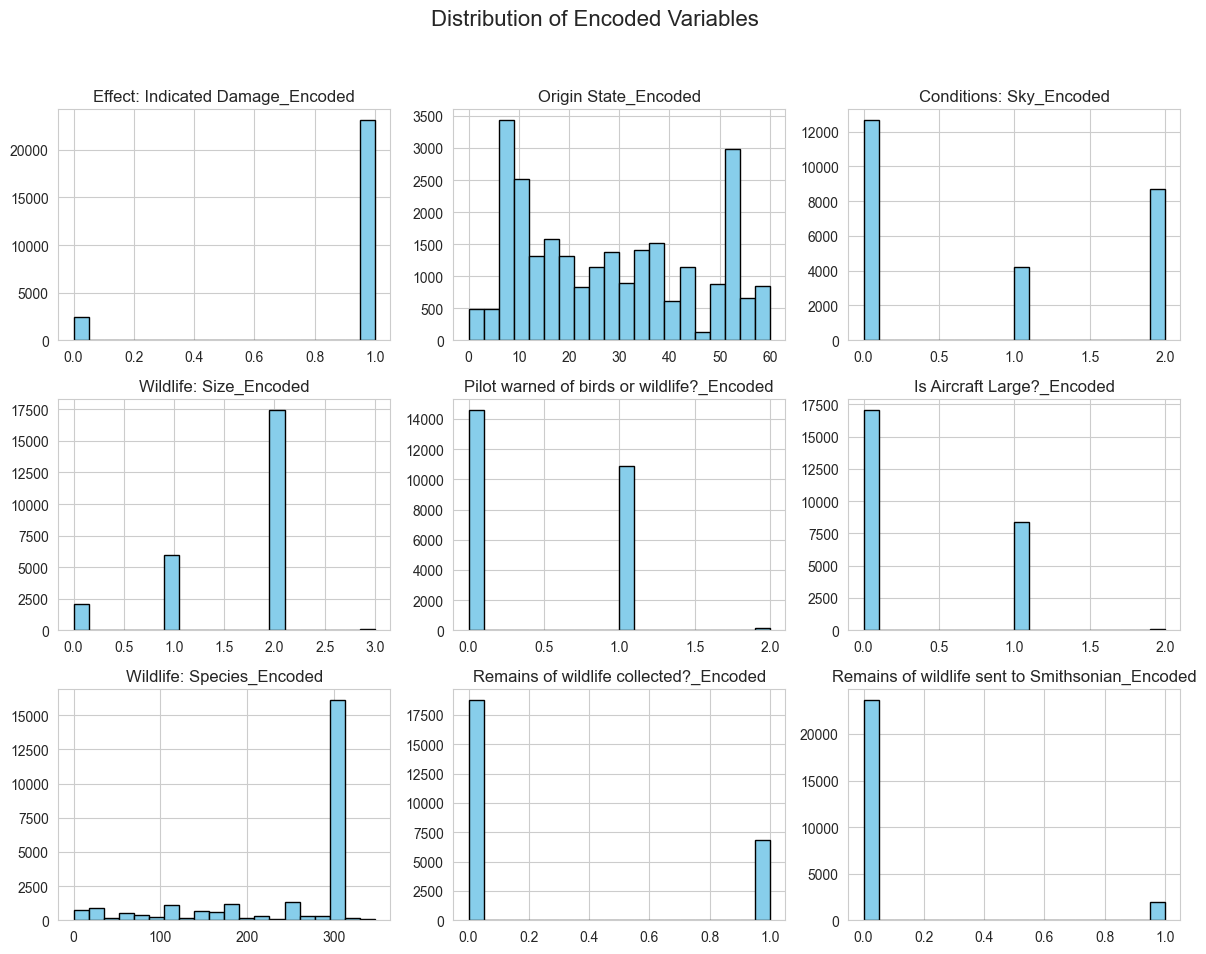

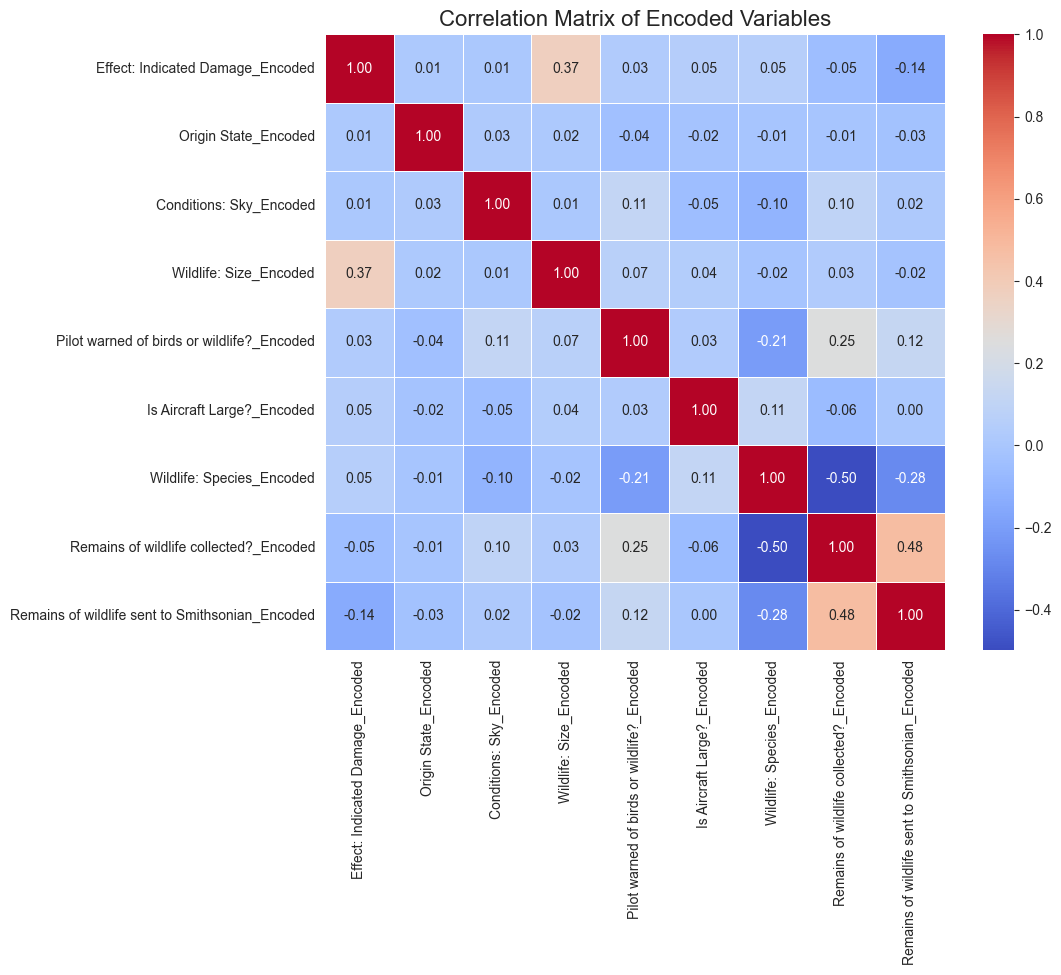

In [11]:
# Set the style of the plots
sns.set_style("whitegrid")

# Plot histograms of the encoded variables
encoded_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Encoded Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot a correlation matrix of the encoded variables
corr_matrix = encoded_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Encoded Variables', fontsize=16)
plt.show()


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

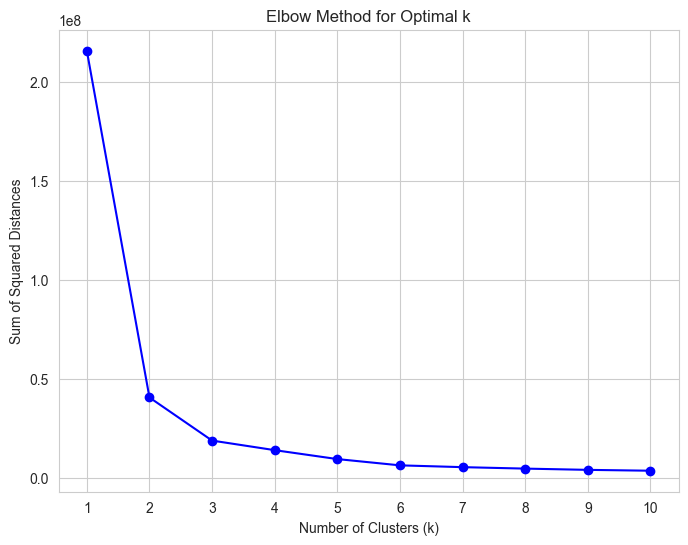

In [12]:
### Cluster Analysis

# Calculate sum of squared distances for different values of k
sse = []
k_range = range(1, 11)  # Testing k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


In [13]:
from sklearn.cluster import KMeans

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans to the encoded data
kmeans.fit(encoded_df)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Add cluster labels to the original DataFrame
encoded_df['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(encoded_df.head())


   Effect: Indicated Damage_Encoded  Origin State_Encoded  \
0                                 0                    34   
1                                 0                    51   
2                                 1                    20   
3                                 1                    56   
4                                 1                    55   

   Conditions: Sky_Encoded  Wildlife: Size_Encoded  \
0                        0                       1   
1                        2                       2   
2                        0                       2   
3                        2                       2   
4                        0                       2   

   Pilot warned of birds or wildlife?_Encoded  Is Aircraft Large?_Encoded  \
0                                           0                           1   
1                                           1                           0   
2                                           0                           0   


C:\Users\Rahi\AppData\Local\Temp\ipykernel_24536\2068271474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df['Cluster'] = cluster_labels


Cluster Means for Encoded Variables:
         Effect: Indicated Damage_Encoded  Origin State_Encoded  \
Cluster                                                           
0                                0.909890             26.938903   
1                                0.883808             28.020540   

         Conditions: Sky_Encoded  Wildlife: Size_Encoded  \
Cluster                                                    
0                       0.793996                1.591910   
1                       0.993253                1.661169   

         Pilot warned of birds or wildlife?_Encoded  \
Cluster                                               
0                                          0.376006   
1                                          0.602399   

         Is Aircraft Large?_Encoded  Wildlife: Species_Encoded  \
Cluster                                                          
0                          0.372776                 291.712410   
1                          0.24272

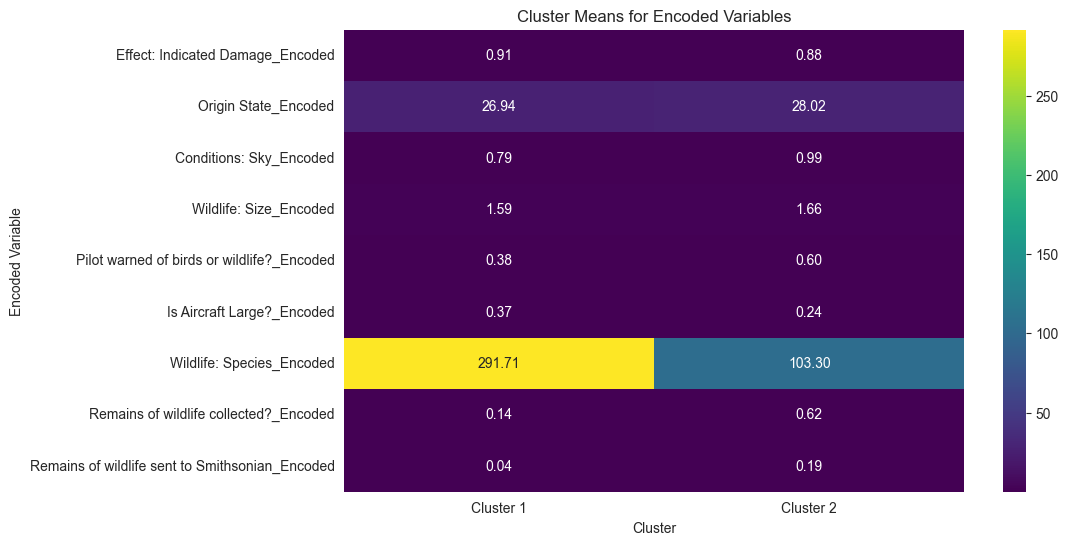

In [17]:
# Calculate cluster means for encoded variables
cluster_means = encoded_df.groupby('Cluster').mean()

# Display cluster means for encoded variables
print("Cluster Means for Encoded Variables:")
print(cluster_means)

# Plot cluster means for encoded variables
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means[encoded_cols].T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Cluster Means for Encoded Variables')
plt.xlabel('Cluster')
plt.ylabel('Encoded Variable')
plt.xticks(ticks=[0.5, 1.5], labels=['Cluster 1', 'Cluster 2'], rotation=0)
plt.show()


Cluster 0 seems to have a higher average for 'Effect: Indicated Damage', 'Conditions: Sky', 'Wildlife: Size', 'Is Aircraft Large?', and 'Wildlife: Species'. This suggests that incidents in Cluster 0 may involve more damage, occur under clearer sky conditions, involve larger wildlife, larger aircraft, and different species compared to Cluster 1.

On the other hand, Cluster 1 tends to have a higher average for 'Origin State', 'Pilot warned of birds or wildlife?', 'Remains of wildlife collected?', and 'Remains of wildlife sent to Smithsonian'. This implies that incidents in Cluster 1 may originate from different states, have more pilot warnings of birds or wildlife, and involve more collection and sending of wildlife remains to the Smithsonian compared to Cluster 0.

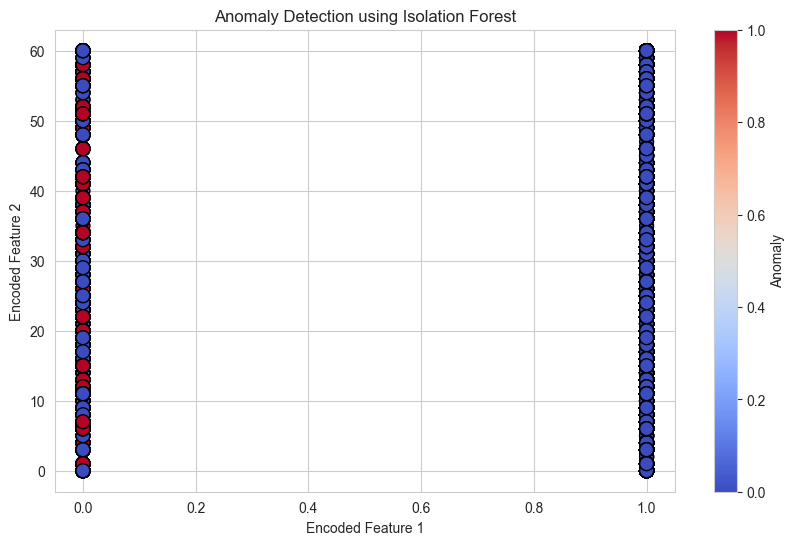

In [21]:
## Anomaly Detection Analysis

# Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the Isolation Forest model to the encoded data
isolation_forest.fit(encoded_df)

# Predict anomalies (outliers)
anomaly_preds = isolation_forest.predict(encoded_df)

# Convert predictions to boolean values (1 for inliers, -1 for outliers)
anomaly_mask = anomaly_preds == -1

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df.iloc[:, 0], encoded_df.iloc[:, 1], c=anomaly_mask, cmap='coolwarm', edgecolors='k', s=100)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.colorbar(label='Anomaly')
plt.show()


An anomaly detection graph being dense at both 0 and 1 indicates that the majority of the data points are clustered around these values, suggesting a relatively balanced distribution. However, the presence of anomalies only at 0 implies that while most of the data points are normal, anomalies occur exclusively at one end of the spectrum (in this case, at 0). 

In [23]:
## Predictive Modelling

# Split data into features (X) and target (y)
X = encoded_df.drop('Effect: Indicated Damage_Encoded', axis=1)  
y = encoded_df['Effect: Indicated Damage_Encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models using cross-validation
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"Model: {name}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean()}")
    print(f"Test accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------")


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Model: Logistic Regression
Cross-validation scores: [0.90684597 0.90633407 0.90853509 0.90755686 0.90682318]
Mean CV accuracy: 0.9072190341909625
Test accuracy: 0.9062989045383412
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.06      0.11       499
           1       0.91      1.00      0.95      4613

    accuracy                           0.91      5112
   macro avg       0.83      0.53      0.53      5112
weighted avg       0.89      0.91      0.87      5112

-----------------------------------------
Model: Decision Tree
Cross-validation scores: [0.88630807 0.88334556 0.88261189 0.88065542 0.88114453]
Mean CV accuracy: 0.882813093271291
Test accuracy: 0.8875195618153364
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33       499
           1       0.93      0.95      0.94      4613

    accuracy                           0.89      5112
   macro avg  

C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

n terms of accuracy, Logistic Regression, Decision Tree, and Random Forest models perform similarly, with accuracy around 90%. However, Logistic Regression and Random Forest models show better performance in predicting the positive class (1), with higher precision, recall, and F1-score compared to Decision Tree and Support Vector Machine models. 